In [26]:
from __future__ import print_function
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [27]:
DF = pd.read_csv('banking.csv')
DF.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Bad_label
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [28]:
print(DF.shape)

(41188, 21)


In [29]:
print(list(DF.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'Bad_label']


In [30]:
print(DF.isnull().sum().sum())

0


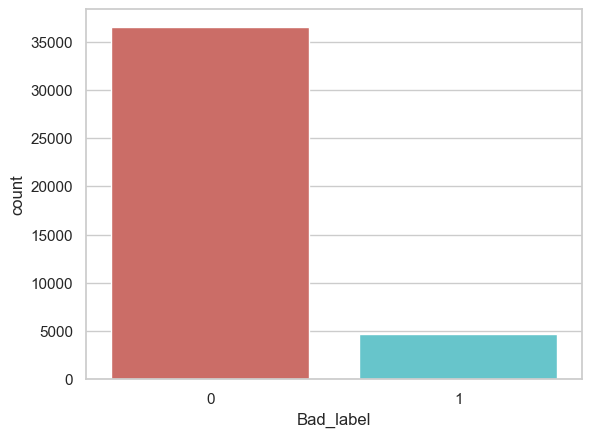

In [31]:
DF['Bad_label'].value_counts()
sns.countplot(x='Bad_label', data=DF, palette='hls')
plt.savefig('count_plot')
plt.show()

In [32]:
# Dummy Varibales-onehot conversion
CHAR_VAR = ['job', 'marital', 'education', 'default',
            'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in CHAR_VAR:
    cat_list = pd.get_dummies(DF[var], prefix=var)
    DF_updated = DF.join(cat_list)
    DF = DF_updated

CHAR_VAR = ['job', 'marital', 'education', 'default',
            'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
DF_VARS = DF.columns.values.tolist()
TO_KEEP = [i for i in DF_VARS if i not in CHAR_VAR]
DATA_FINAL = DF[TO_KEEP]

DATA_FINAL.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,False,False,False,False,True,False,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,False,False,False,False,True,False,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,True,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,False,False,True,False,False,False,False,False,False,True


In [33]:
# dependent (X) and independent (Y) variables
X = DATA_FINAL.drop('Bad_label', axis=1)
Y = DATA_FINAL.Bad_label
FEATURE_LABELS = DATA_FINAL.columns[1:]

In [34]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [43]:
# Train A Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, Y_train)
for feature in zip(FEATURE_LABELS, clf.feature_importances_):
    print(feature)
    print(sorted(feature, key=lambda x: x[1]))

('duration', 0.07769367421676474)


IndexError: invalid index to scalar variable.

<BarContainer object of 63 artists>

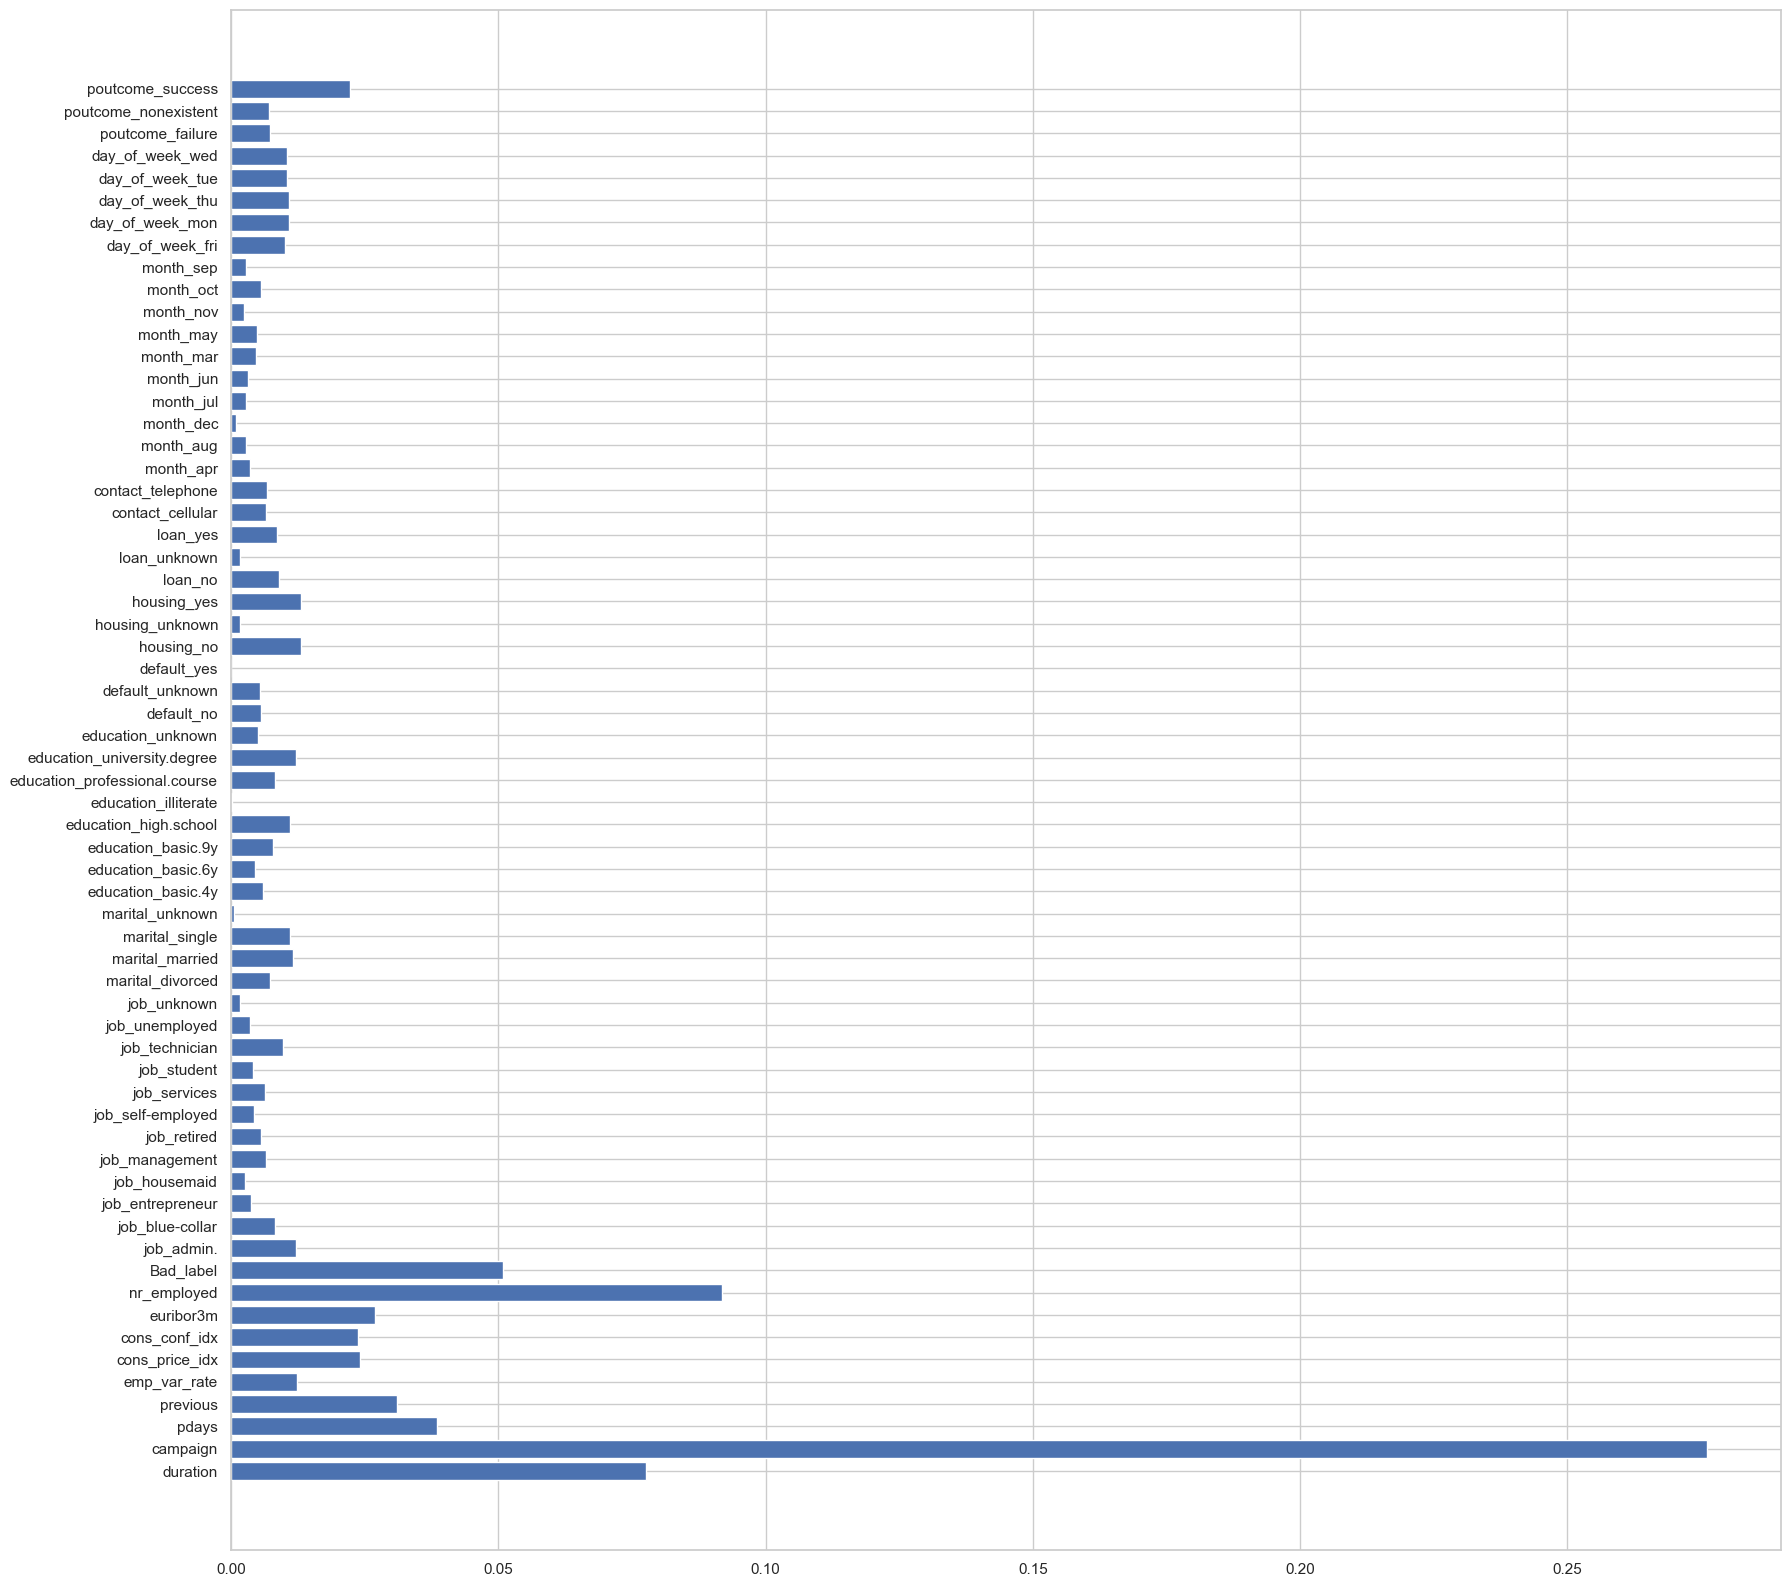

In [44]:
plt.figure(figsize=(20,20))
plt.barh(FEATURE_LABELS,clf.feature_importances_)

In [45]:
# most 10 important features
# 'campaign', 0.27728974589153127 - 2
# 'nr_employed', 0.09050836563990655 -9
# 'duration', 0.07945563510149121 - 1
# 'Bad_label', 0.05016257670167846 - 10
# 'pdays', 0.03841490639937689 - 3
# 'previous', 0.029742359761027973 -4
# 'euribor3m', 0.027031772743079746 -8
# 'cons_price_idx', 0.023344748847786083 -6
# 'cons_conf_idx', 0.022776755597658845 -7
# 'poutcome_success', 0.020471302462824574 -63
# 'housing_yes', 0.01350307854627908 -40
# 'housing_no', 0.013470781739118977 - 38

# drop the features that we do not need.
DATA_FINAL.drop(DATA_FINAL.columns[[0, 5, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                    22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                    35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]],
                axis=1, inplace=True)

C:\Users\a.iskendirov\AppData\Local\Temp\ipykernel_15124\2673669471.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_FINAL.drop(DATA_FINAL.columns[[0, 5, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,


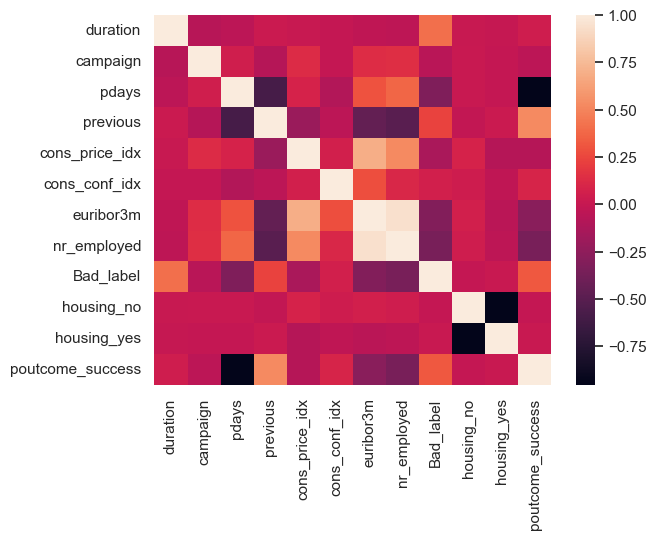

In [46]:
# Check the independence between the independent variables
sns.heatmap(DATA_FINAL.corr())
plt.show()

In [47]:
# dependent and independent variables
X_final = DATA_FINAL.drop('Bad_label', axis=1)
Y_final = DATA_FINAL.Bad_label
X_final_train, X_final_test, Y_final_train, Y_final_test = \
    train_test_split(X_final, Y_final, test_size=0.3)

In [48]:
# Logistic Regression Model
CLASSIFIER = LogisticRegression(random_state=0)
CLASSIFIER.fit(X_final_train, Y_final_train)
Y_PREDICT = CLASSIFIER.predict(X_final_test)

In [50]:
# accuracy, precision, recall, F-measure and support
CONFUSION_MATRIX = confusion_matrix(Y_final_test, Y_PREDICT)
print(CONFUSION_MATRIX)
print('Accuracy of LR classifier: {:.2f}'.format(CLASSIFIER.score(X_final_test, Y_final_test)))
print(classification_report(Y_final_test, Y_PREDICT))

[[10671   277]
 [  831   578]]
Accuracy of LR classifier: 0.91
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10948
           1       0.68      0.41      0.51      1409

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

